In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading data set
df = pd.read_csv('smoke_detection_iot.csv')

In [3]:
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
# Data set shape
df.shape

(62630, 16)

In [5]:
# Checking for nulls
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [8]:
# Statistical summery of the features
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [9]:
# Checking for imbalance in the data set
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

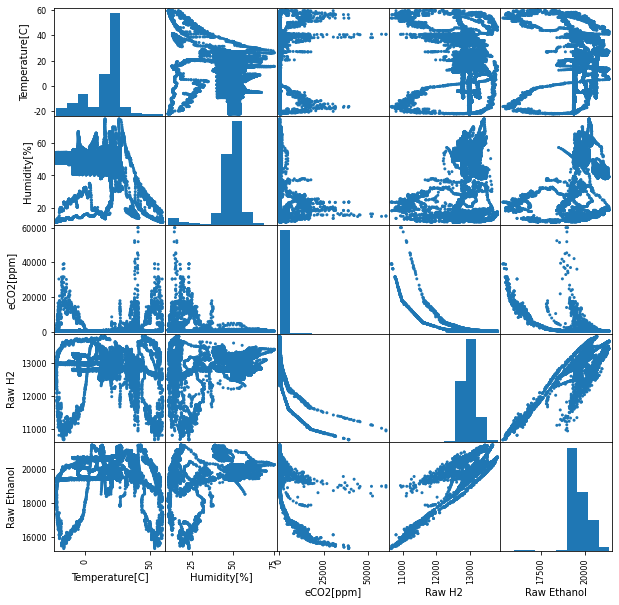

In [10]:
# Finding distribution and relation ships between Temperature, Humidity, eCO2, Raw H2, Raw Ethanol
pd.plotting.scatter_matrix(df[['Temperature[C]','Humidity[%]','eCO2[ppm]','Raw H2','Raw Ethanol']], figsize=(10,10),alpha=1);

In [11]:
# Dropping the ID and UTC columns
df.drop(df.columns[[0,1]],axis=1, inplace=True)

In [12]:
# Defining features and label
X = df.drop(columns='Fire Alarm')
y = df['Fire Alarm'].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [14]:
X[0]

array([0.51269221, 0.72323922, 0.        , 0.        , 0.52248804,
       0.52568521, 0.98601399, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [15]:
# Seperating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

## ANN

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [17]:
# Creating ANN model
classifier = Sequential()

classifier.add(Dense(units = 15, activation = 'relu', input_shape=X_train[0].shape))
classifier.add(Dense(units = 15, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Fitting ANN model
classifier.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
4385/4385 [==============================] - 5s 1ms/step - loss: 0.0976 - accuracy: 0.9660
Epoch 2/10
4385/4385 [==============================] - 4s 1ms/step - loss: 0.0132 - accuracy: 0.9971
Epoch 3/10
4385/4385 [==============================] - 4s 987us/step - loss: 0.0081 - accuracy: 0.9980
Epoch 4/10
4385/4385 [==============================] - 4s 977us/step - loss: 0.0063 - accuracy: 0.9984
Epoch 5/10
4385/4385 [==============================] - 4s 985us/step - loss: 0.0056 - accuracy: 0.9984
Epoch 6/10
4385/4385 [==============================] - 4s 978us/step - loss: 0.0047 - accuracy: 0.9987
Epoch 7/10
4385/4385 [==============================] - 4s 981us/step - loss: 0.0045 - accuracy: 0.9987
Epoch 8/10
4385/4385 [==============================] - 4s 987us/step - loss: 0.0037 - accuracy: 0.9990
Epoch 9/10
4385/4385 [==============================] - 4s 986us/step - loss: 0.0037 - accuracy: 0.9991
Epoch 10/10
4385/4385 [==============================] - 4s 975us/st

In [19]:
# Predictions
y_pred = classifier.predict(X_test)
# Binarizing predictions
y_pred = (y_pred > 0.5)

588/588 [==============================] - 1s 832us/step


In [20]:
# caluclating measures of performance
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [21]:
print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('F1 score: ', f1)

Accuracy:  0.9998403321092129
Recall:  0.9998503666018256
Precision:  0.9999251777029555
F1 score:  0.9998877707530582


## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Creating Random Forest Classifier Model
ml = RandomForestClassifier(random_state=0)

In [24]:
# Fitting the model with the training data
ml.fit(X_train, y_train)
# Predictions
y_pred = ml.predict(X_test)

In [25]:
# caluclating measures of performance
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [26]:
print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('F1 score: ', f1)

Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1 score:  1.0
